In [2]:
import os
import numpy as np
import cv2
from collections import defaultdict
import shutil

In [3]:
DATA_DIR = '../data'
POSITIVE = 'COVID-19-PATIENTS-P'
NEGATIVE = 'COVID-19-PATIENTS-N'
POSITIVE_DIR = os.path.join(DATA_DIR, POSITIVE)
NEGATIVE_DIR = os.path.join(DATA_DIR, NEGATIVE)
OUTPUT_DIR = '../data_selected'
if not os.path.isdir(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR, exist_ok=True)

In [4]:
positive_patients = list(filter(lambda x: os.path.isdir(os.path.join(POSITIVE_DIR, x)), os.listdir(POSITIVE_DIR)))
negative_patients = list(filter(lambda x: os.path.isdir(os.path.join(NEGATIVE_DIR, x)), os.listdir(NEGATIVE_DIR)))

In [ ]:
def is_image(file_name):
    ext = os.path.splitext(os.path.basename(file_name))[1]
    if ext in ['.jpg','.JPG', '.jpeg', '.JPEG', '.png', '.PNG', '.bmp', '.BMP']:
        return True
    else:
        return False

In [5]:

# 处理正样本数据
positive_case_num = 0
positive_patient_to_cases = defaultdict(list)
for patient in positive_patients:
    for year in os.listdir(os.path.join(POSITIVE_DIR, patient)):
        for date in os.listdir(os.path.join(POSITIVE_DIR, patient, year)):
            case_dir = os.path.join(POSITIVE_DIR, patient, year, date)
            images = list(filter(is_image, os.listdir(case_dir)))
            cate = [image.split('-')[1] for image in images]
            unique_cate = set(cate)
            if len(unique_cate) == 0:
                print(case_dir)
            selected_cate = None
            if unique_cate == set(['0002', '0003']):
                selected_cate = '0003'
            elif unique_cate == set(['0006', '0007']):
                selected_cate = '0007'
            elif len(unique_cate) == 1:
                selected_cate = list(unique_cate)[0]
            elif unique_cate == set(['0007', '0005', '0006']):
                selected_cate = '0007'
            elif unique_cate == set(['0003', '0004']):
                selected_cate = '0003'
            elif unique_cate == set(['0007', '0008']):
                selected_cate = '0008'
            elif unique_cate == set(['0005', '0006']):
                selected_cate = '0005'
            elif unique_cate == set(['0005', '0007']):
                selected_cate = '0007'
            elif unique_cate == set(['0004', '0007']):
                selected_cate = '0007'
            elif unique_cate == set(['0005', '0001']):
                selected_cate = '0005'
            elif unique_cate == set(['0005', '0004']):
                selected_cate = '0005'
            elif unique_cate == set(['0002', '0006']):
                selected_cate = '0006'
            elif unique_cate == set(['0014', '0016']):
                selected_cate = '0014'
            elif unique_cate == set(['0001', '0002', '0003']):
                selected_cate = '0003'
            elif unique_cate == set(['0004', '0002', '0003']):
                selected_cate = '0003'
            elif unique_cate == set(['0001', '0005', '0006']):
                selected_cate = '0005'
            elif unique_cate == set(['0007', '0004', '0001', '0006', '0005']):
                selected_cate = '0007'
            else:
                print(case_dir, unique_cate)
            # we should select proper series
            selected_images = []
            for index, image in enumerate(images):
                if cate[index] == selected_cate:
                    selected_images.append(image)
            positive_case_num += 1
            for selected_image in selected_images:
                origin_path = os.path.join(case_dir, selected_image)
                output_path = os.path.join(OUTPUT_DIR, 'positive', patient, year, date, selected_image)
                if not os.path.isdir(os.path.dirname(output_path)):
                    os.makedirs(os.path.dirname(output_path), exist_ok=True)
                shutil.copyfile(origin_path, output_path)
            positive_patient_to_cases[patient].append(os.path.join('positive', patient, year, date))

In [6]:
# 处理负样本数据
negative_case_num = 0
negative_patient_to_cases = defaultdict(list)
for patient in negative_patients:
    if patient == '疑似病例':
        for patient in os.listdir(os.path.join(NEGATIVE_DIR, '疑似病例')):
            for year in os.listdir(os.path.join(NEGATIVE_DIR, '疑似病例', patient)):
                for date in os.listdir(os.path.join(NEGATIVE_DIR, '疑似病例', patient, year)):
                    case_dir = os.path.join(NEGATIVE_DIR, '疑似病例', patient, year, date)
                    images = list(filter(is_image, os.listdir(case_dir)))
                    cate = [image.split('-')[1] for image in images]
                    unique_cate = set(cate)
                    selected_cate = None
                    if len(unique_cate) == 0:
                        print(case_dir)
                    if len(unique_cate) == 1:
                        selected_cate = list(unique_cate)[0]
                    else:
                        print(case_dir, unique_cate)
                    # we should select proper series
                    selected_images = []
                    for index, image in enumerate(images):
                        if cate[index] == selected_cate:
                            selected_images.append(image)
                    negative_case_num += 1
                    time = year+'_'+date
                    for selected_image in selected_images:
                        origin_path = os.path.join(case_dir, selected_image)
                        output_path = os.path.join(OUTPUT_DIR, 'negative', patient, time, selected_image)
                        if not os.path.isdir(os.path.dirname(output_path)):
                            os.makedirs(os.path.dirname(output_path), exist_ok=True)
                        shutil.copyfile(origin_path, output_path)
                    negative_patient_to_cases[patient].append(os.path.join('negative', patient, time))
                    negative_case_num += 1
    else:
        for time in os.listdir(os.path.join(NEGATIVE_DIR, patient)):
            case_dir = os.path.join(NEGATIVE_DIR, patient, time)
            images = list(filter(is_image, os.listdir(case_dir)))
            cate = [image.split('-')[1] for image in images]
            unique_cate = set(cate)
            if len(unique_cate) == 0:
                print(case_dir)
            selected_cate = None
            if unique_cate == set(['0001', '0002', '0003', '0004', '0005', '0006']):
                selected_cate = '0002'
            elif unique_cate == set(['0001', '0002', '0003', '0004', '0005']):
                selected_cate = '0002'
            elif unique_cate == set(['0001', '0002', '0003', '0004']):
                selected_cate = '0001'
            elif unique_cate == set(['0001', '0002', '0003', '0004', '0005', '0006', '0007']):
                selected_cate = '0004'
            elif unique_cate == set(['0007', '0004', '0001', '0009', '0006', '0003', '0005', '0002', '0008']):
                selected_cate = '0005'
            elif unique_cate == set(['0007', '0011', '0004', '0001', '0009', '0006', '0003', '0005', '0010', '0002', '0008']):
                selected_cate = '0005'
            else:
                print(case_dir, unique_cate)
                
            # we should select proper series
            selected_images = []
            for index, image in enumerate(images):
                if cate[index] == selected_cate:
                    selected_images.append(image)
            negative_case_num += 1
            for selected_image in selected_images:
                origin_path = os.path.join(case_dir, selected_image)
                output_path = os.path.join(OUTPUT_DIR, 'negative', patient, time, selected_image)
                if not os.path.isdir(os.path.dirname(output_path)):
                    os.makedirs(os.path.dirname(output_path), exist_ok=True)
                shutil.copyfile(origin_path, output_path)
            negative_patient_to_cases[patient].append(os.path.join('negative', patient, time))
            negative_case_num += 1
        

In [7]:
print('positive patients: {}\n negative patients: {}\n positive samples: {}\n negative samples: {}'
      .format(len(positive_patient_to_cases), len(negative_patient_to_cases), positive_case_num, negative_case_num))

positive patients: 155
 negative patients: 90
 positive samples: 316
 negatibe samples: 192


In [8]:
import json
import codecs
data_result = {k: {'cases': w, 'label': 1} for k,w in positive_patient_to_cases.items()}
for k,w in negative_patient_to_cases.items():
    data_result[k] = {'cases': w, 'label': 0}
with codecs.open('../data_selected/data.json', 'w', encoding="utf-8") as writer:
    json.dump(data_result, writer, ensure_ascii=False)

In [24]:
import random
patient_list = list(data_result.keys())
random.shuffle(patient_list)

In [27]:
len(patient_list)

245

In [55]:
segmentation_post_dir = '../data_seg_post'
data_post_dir = '../data_selected_post'
SEG_DIR = '../data_segmentation'
threshold = 0.5
for patient, value in data_result.items():
    cases = value['cases']
    for case in cases:
        case_dir = os.path.join(OUTPUT_DIR, case)
        mask_dir = os.path.join(SEG_DIR, case)
        image_paths = sorted(os.listdir(case_dir))
        mask_paths = sorted(os.listdir(mask_dir))
        ratios = []
        for index in range(len(image_paths)):
            image_path = image_paths[index]
            mask_path = mask_paths[index]
            mask = cv2.imread(os.path.join(mask_dir, mask_path), 0)
            image = cv2.imread(os.path.join(case_dir, image_path))
            binary_mask = np.zeros(mask.shape, np.uint8)
            binary_mask[mask>200] = 1
            ratio = np.sum(binary_mask) / (mask.shape[0] * mask.shape[1])
            ratios.append(ratio)
        max_ratio = max(ratios)
        choosed = [1 if ratio/max_ratio > threshold else 0 for ratio in ratios]
        
#         for index in range(len(image_paths)):
#             if choosed[index] == 1:
#                 image_path = image_paths[index]
#                 mask_path = mask_paths[index]
#                 origin_image_path = os.path.join(case_dir, image_path)
#                 output_image_path = os.path.join(data_post_dir, case, image_path)
#                 origin_mask_path = os.path.join(mask_dir, mask_path)
#                 output_mask_path = os.path.join(segmentation_post_dir, case, mask_path)
                
#                 if not os.path.isdir(os.path.dirname(output_image_path)):
#                     os.makedirs(os.path.dirname(output_path), exist_ok=True)
#                 shutil.copyfile(origin_image_path, output_image_path)
                
                
        
            
            
            
            
            
        
    

../data_selected/positive/安桂英/20003762/18159462
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../data_selected/positive/曹余辉/20003387/18158617
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
../data_selected/positive/常玉敏/20003690/18159117
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
../data_selected/positive/陈会青/20012700319/18157387
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
../data_selected/positive/陈会青/20012400557/18156599
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/陈会青/20003176/18158603
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

../data_selected/positive/丁成/20003242/18158485
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
../data_selected/positive/丁成/20003242/18157915
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
../data_selected/positive/丁大群/20002968/18158608
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/丁大群/20002968/18157456
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/丁大群/20002968/18156936
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/丁连武/20002948/18158609
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

../data_selected/positive/朗东海/20003495/18158870
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/李成亮/20003790/18159802
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

../data_selected/positive/李伟/20003504/18158733
[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
../data_selected/positive/李新民/20003202/18158463
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/李新民/20003202/18157905
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
../data_selected/positive/李新影/20003420/18158448
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../data_selected/po

../data_selected/positive/刘志帮/20002822/18158292
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/刘志帮/20002822/18157702
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
../data_selected/positive/刘志帮/20002822/18157241
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/刘治点/20003555/18158881
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/卢彬/20002962/18158293
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
../data_selected/positive/卢彬/20002962/18157460
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

../data_selected/positive/孙方云138/20003765/18159553
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

../data_selected/positive/王马丽/20003370/18158450
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

../data_selected/positive/王帅/20003392/18159445
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../data_selected/positive/王帅/20003392/18159774
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1

../data_selected/positive/熊诗友/20002966/18158599
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
../data_selected/positive/熊诗友/20002966/18158125
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
../data_selected/positive/熊诗友/20002966/18157711
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
../data_selected/positive/徐翔/20003347/18158476
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/徐翔/20003347/18158122
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
../data_selected/positive/徐影/20003747/18159368
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

../data_selected/positive/易志琴/20003650/18158923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
../data_selected/positive/张彪/20003289/18158297
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/张彪/20003289/18157902
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/张虎/20003390/18158301
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/张敏/20003290/18158616
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
../

../data_selected/positive/赵忠祥/20003382/18159082
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/赵忠祥/20003382/18159271
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

../data_selected/positive/邹梦昊132外院2.8/20003758/18159634
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

../data_selected/positive/张浩  亳州转诊/20003717/18159373
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

../data_selected/positive/李世举/20002535/18158612
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/李世举/20002535/18157826
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/李世举/20002535/18156923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/李世举/20002535/18155322
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/李传友/20003634/18158887
[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

../data_selected/positive/李淮河/20002720/18155808
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/李淮河/20002720/18157239
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/李淮河/20002720/18158127
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
../data_selected/positive/李淮河/20002720/18158622
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../data_selected/positive/杨俊/20003299/18158286
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/positive/杨俊/20003299/18158778
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

../data_selected/positive/王庆华 普通到重型/20003713/18159712
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../data_selected/positive/白计远/20002678/18155809
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

../data_selected/positive/陈大军/20003457/18159432
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

../data_selected/positive/高俊杰/20003294/18159701
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../data_selected/positive/高素兰/20003766/18159567
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

../data_selected/negative/WU_SONG_NIAN-吴颂年-WU_SONG_NIAN/2020_2_23_14_22_48
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/negative/XU_HONG_MEI-徐红梅-XU_HONG_MEI/2020_2_14_4_32_05
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
../data_selected/negative/YANG_LIAN_MING-杨连明-YANG_LIAN_MING/2020_3_6_15_06_06
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
../data_selected/negative/YAN_CUI_YING-严翠英-YAN_CUI_YING/2020_2_2_13_38_05
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]
../data_selected/negative/YAN_FA_BING-鄢发兵-YAN_FA_BING/2020_3_4_9_18_05
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../data_selected/negative/YAN_JI-严机-YAN_JI/2020_3_2_14_04_15
[1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

../data_selected/negative/刘灵/20003112_18157904
[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../data_selected/negative/刘炳恒/20020300243_18158674
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

../data_selected/negative/张明星/20020900159_18159393
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../data_selected/negative/张来喜/20003822_18160601
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

../data_selected/negative/杨玉梅/20003476_18158899
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

../data_selected/negative/苗少明/20003446_18158905
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [8]:
# get test patient list
import os
import fnmatch
test_dir = '../data_test'
cases = []
for child in os.listdir(os.path.join(test_dir, '总院独立验证集')):
    temp_dir = os.path.join(test_dir, '总院独立验证集', child)
    if os.path.isdir(temp_dir):
        for d in os.listdir(temp_dir):
            if os.path.isdir(os.path.join(temp_dir, d)):
                images = list(fnmatch.filter(os.listdir(os.path.join(temp_dir, d)), '*.jpg'))
                if len(images) != 0:
                    cases.append(os.path.join('总院独立验证集', child, d))
                else:
                    print('{} is empty'.format(os.path.join('总院独立验证集', child, d)))

for child in os.listdir(os.path.join(test_dir, '东院独立验证集')):
    temp_dir = os.path.join(test_dir, '东院独立验证集', child)
    if child == '东院':
        for d in os.listdir(temp_dir):
            if os.path.isdir(os.path.join(temp_dir, d)):
                images = list(fnmatch.filter(os.listdir(os.path.join(temp_dir, d)), '*.jpg'))
                if len(images) != 0:
                    cases.append(os.path.join('东院独立验证集', child, d))
                else:
                    print('{} is empty'.format(os.path.join('东院独立验证集', child, d)))
                
    else:
        if os.path.isdir(temp_dir):
            images = list(fnmatch.filter(os.listdir(temp_dir), '*.jpg'))
            if len(images) != 0:
                cases.append(os.path.join('东院独立验证集', child))
            else:
                print('{} is empty'.format(os.path.join('东院独立验证集', child)))
print(cases)
            
            
        

总院独立验证集/V1病毒性肺炎待排/总院 is empty
总院独立验证集/V3可疑病毒性肺炎/12054932 is empty
['总院独立验证集/v10除外合并病毒性肺炎可能 东院两例/12058411 1', '总院独立验证集/v10除外合并病毒性肺炎可能 东院两例/12058411 5', '总院独立验证集/v10除外合并病毒性肺炎可能 东院两例/12059149', '总院独立验证集/v11病毒性炎症不除外/12047001', '总院独立验证集/v11病毒性炎症不除外/12059937', '总院独立验证集/v12病毒性肺炎可疑/11263274', '总院独立验证集/V13病毒性可能/12047733', '总院独立验证集/V14病毒性肺炎首先考虑/12047805', '总院独立验证集/v15病毒性感染不排除/12047110', '总院独立验证集/V16病毒性感染不能除外/10315446', '总院独立验证集/V17病毒性肺炎待除外/11121850', '总院独立验证集/V17病毒性肺炎待除外/12053429', '总院独立验证集/V2考虑病毒性肺炎/11954643', '总院独立验证集/V2考虑病毒性肺炎/12046083', '总院独立验证集/V2考虑病毒性肺炎/12046084', '总院独立验证集/V2考虑病毒性肺炎/12046085', '总院独立验证集/V2考虑病毒性肺炎/12046109', '总院独立验证集/V2考虑病毒性肺炎/12047249', '总院独立验证集/V2考虑病毒性肺炎/12049476', '总院独立验证集/V2考虑病毒性肺炎/12049597', '总院独立验证集/V2考虑病毒性肺炎/12053281', '总院独立验证集/V3可疑病毒性肺炎/12054931', '总院独立验证集/V4除外病毒性肺炎/10099850', '总院独立验证集/V4除外病毒性肺炎/10570487', '总院独立验证集/V4除外病毒性肺炎/11057932', '总院独立验证集/V4除外病毒性肺炎/11951546', '总院独立验证集/V4除外病毒性肺炎/12046075', '总院独立验证集/V4除外病毒性肺炎/12046091', '总院独立验证集/V4除外病毒性肺炎/12046099', '总院独立验证集/V4除外

In [47]:
import subprocess

pipe = subprocess.Popen('find ../data_test -regex .*\\.jpg', stdout=subprocess.PIPE, shell=True)
output = pipe.communicate()
output = str(output[0].decode('utf-8'))
output = output.split('\n')
cases = set(['/'.join(out.split('/')[2:-1]) for out in output])
cases = list(sorted([case for case in cases if case != '']))
print(cases)

['东院独立验证集/11396391', '东院独立验证集/11879476', '东院独立验证集/11949654', '东院独立验证集/11953067', '东院独立验证集/12014799', '东院独立验证集/12054536', '东院独立验证集/12054552', '东院独立验证集/12055039', '东院独立验证集/12055086', '东院独立验证集/12055112', '东院独立验证集/12055227', '东院独立验证集/12055287', '东院独立验证集/12055532', '东院独立验证集/12055643', '东院独立验证集/12056111', '东院独立验证集/12056218', '东院独立验证集/12056254', '东院独立验证集/12057290', '东院独立验证集/12057700', '东院独立验证集/12059198', '东院独立验证集/12059234', '东院独立验证集/12060037', '东院独立验证集/12060923', '东院独立验证集/12061054', '东院独立验证集/12061099', '东院独立验证集/12061378', '东院独立验证集/12061469', '东院独立验证集/12061559', '东院独立验证集/12061587', '东院独立验证集/12061621', '东院独立验证集/12062933', '东院独立验证集/12062971', '东院独立验证集/12063389', '东院独立验证集/12063417', '东院独立验证集/12063610', '东院独立验证集/12063628', '东院独立验证集/12063699', '东院独立验证集/12063914', '东院独立验证集/12063960', '东院独立验证集/12063980', '东院独立验证集/12063993', '东院独立验证集/12064090', '东院独立验证集/东院/D12020165', '东院独立验证集/东院/D12049890', '东院独立验证集/东院/D12051378', '东院独立验证集/东院/D12051378/_j191410__0412020959', '东院独立验证集/东院/D12051414', '东院独立验证集/东院/D12051

In [64]:
import re
pattern = r'\d{8}'
positive_case = ['12045466', '12046075', '12046085', '12046176', '12046083', '12046084']
labels = []
for case in cases:
    matched = re.search(pattern, case)
    if matched is not None:
        study_id = str(matched.group())
        if study_id in positive_case:
            labels.append(1)
            print(case)
        else:
            labels.append(0)

总院独立验证集/V2考虑病毒性肺炎/12046083
总院独立验证集/V2考虑病毒性肺炎/12046083/_j191410__0412125218
总院独立验证集/V2考虑病毒性肺炎/12046084
总院独立验证集/V2考虑病毒性肺炎/12046085
总院独立验证集/V2考虑病毒性肺炎/12046085/_j191410__0412125449
总院独立验证集/V4除外病毒性肺炎/12046075
总院独立验证集/V4除外病毒性肺炎/12046075/_j191410__0412044126
总院独立验证集/V5病毒性肺炎不除外/12046176
总院独立验证集/V5病毒性肺炎不除外/12046176/_j191410__0412015448
总院独立验证集/V6病毒性肺炎可能/12045466
总院独立验证集/V6病毒性肺炎可能/12045466/2.5


In [52]:
import json
import codecs
with codecs.open(os.path.join(test_dir, 'data_test.json'), 'w', encoding='utf-8') as writer:
    json.dump({'cases': cases, 'labels': labels}, writer, ensure_ascii=False)

/home/xxc/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/xxc/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/xxc/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/xxc/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/xxc/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/xxc/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_l

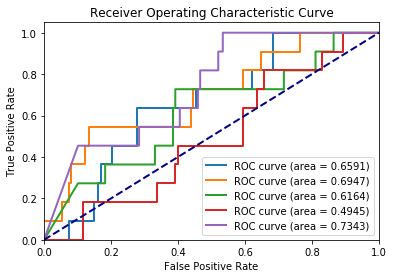

In [63]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

paths = ['../exps/test/fold-1/epoch-11/result.npz',
         '../exps/test/fold-2/epoch-5/result.npz',
         '../exps/test/fold-3/epoch-19/result.npz',
         '../exps/test/fold-4/epoch-11/result.npz',
         '../exps/test/fold-5/epoch-7/result.npz'
        ]
for index, path in enumerate(paths):
    npzfile = np.load(path)
    fpr, tpr, roc_auc = npzfile['fpr'], npzfile['tpr'], npzfile['roc_auc']
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:0.4f})'.format(roc_auc))
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
# plt.legend(loc="lower right", labels=('fold-1', 'fold-2', 'fold-3', 'fold-4', 'fold-5'))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.savefig('roc.png')